# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Load the Training Data

In [2]:
df_train = pd.read_csv('assets/mnist_train.csv')

In [3]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = df_train.loc[:,'1x1':].values
y_train = df_train['label'].values

In [5]:
print('Shape of X_train is {shape}'.format(shape = X_train.shape))
print('Shape of y_train is {shape}'.format(shape = y_train.shape))

Shape of X_train is (60000, 784)
Shape of y_train is (60000,)


## Neural Network

In [6]:
# There are 784 inputs and 10 outputs
weights = np.zeros((784,10))

# There are 60000 labels
# eg. label = 1 => The goal_pred will be 1,0,0,0,0,0,0,0,0,0
goal_preds = np.zeros((60000,10))
for i in range(len(y_train)):
    goal_preds[i][y_train[i]] = 1

In [7]:
print(y_train[0])
print(goal_preds[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
alpha = 0.01
for i in range(5):
    for index in range(len(X_train)):
        inputs = np.interp(X_train[index],(X_train[index].min(),X_train[index].max()),(0,1)).reshape(1,784)

        preds = inputs @ weights
        error = preds - goal_preds[index]

        del_weights = inputs.reshape((784,1)) @ error.reshape((1,10)) 
        weights -= (alpha * del_weights)

In [9]:
weights

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Visualise any weight

In [10]:
def visual(value):
    '''
    takes in value of the class
    ouputs the corresponding weights
    as images
    '''
    assert(0<=value<=9)
    im = weights[:,value].reshape((28,28))
    plt.imshow(im)
    plt.show()

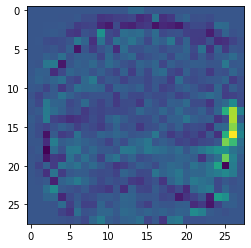

In [11]:
visual(2)

# Load the Test Dataset

In [12]:
df_test = pd.read_csv('assets/mnist_test.csv')

In [13]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_test = df_test.loc[:,'1x1':].values
y_test = df_test['label'].values

In [15]:
count = 0
for index in range(len(X_test)):
    inputs = np.interp(X_test[index],(X_test[index].min(),X_test[index].max()),(0,1)).reshape(1,784)
    
    preds = inputs @ weights
    if y_test[index] == preds.argmax():
        count +=1

In [16]:
percent_correct = count / len(X_test)
print(percent_correct)

0.7009


In [17]:
count = 0
for index in range(len(X_train)):
    inputs = np.interp(X_train[index],(X_train[index].min(),X_train[index].max()),(0,1)).reshape(1,784)
    
    preds = inputs @ weights
    if y_train[index] == preds.argmax():
        count +=1

In [18]:
percent_correct = count / len(X_train)
print(percent_correct)

0.70915
